## Import packages 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split,KFold
#from sklearn.cross_validation import KFold   #For K-fold cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import metrics

## Load Training data

In [2]:
df = pd.read_csv("TRAINING.csv",header = 0)
df.head()

,Area,Perimeter,Radius,Label
0,173.0,36.70,7.42070,Stage 1
1,184.0,37.40,7.65303,Stage 1
2,1248.0,128.83,19.93100,Stage 1
3,990.6,116.40,17.70000,Stage 2
4,876.0,104.00,16.70000,Stage 2


In [3]:
df.Label.unique()

array(['Stage 1', 'Stage 2', 'Stage 3'], dtype=object)

In [4]:
df['Label'] = df['Label'].map({'Stage 1':1,'Stage 2':2, 'Stage 3':3})
df.head()

,Area,Perimeter,Radius,Label
0,173.0,36.70,7.42070,1
1,184.0,37.40,7.65303,1
2,1248.0,128.83,19.93100,1
3,990.6,116.40,17.70000,2
4,876.0,104.00,16.70000,2


In [5]:
df.describe()

,Area,Perimeter,Radius,Label
count,89.000000,89.000000,89.000000,89.000000
mean,659.837079,109.416382,13.322797,1.842697
std,545.174044,90.064836,5.716368,0.736991
min,123.000000,36.700000,6.250000,1.000000
25%,238.000000,46.400000,8.703800,1.000000
50%,389.000000,79.500000,11.127000,2.000000
75%,1152.000000,127.300000,19.140000,2.000000
max,1969.000000,303.100000,25.035000,3.000000


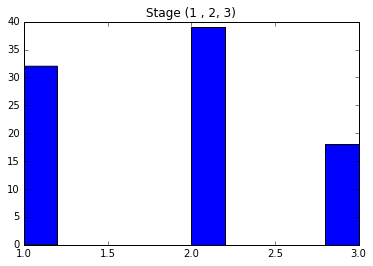

In [7]:
plt.hist(df['Label'])
plt.title('Stage (1 , 2, 3)')
plt.show()

In [8]:
features_mean=list(df.columns[0:3])
print features_mean

['Area', 'Perimeter', 'Radius']


In [9]:
df1=df[df['Label'] ==1]
df2=df[df['Label'] ==2]
df3=df[df['Label'] ==3]

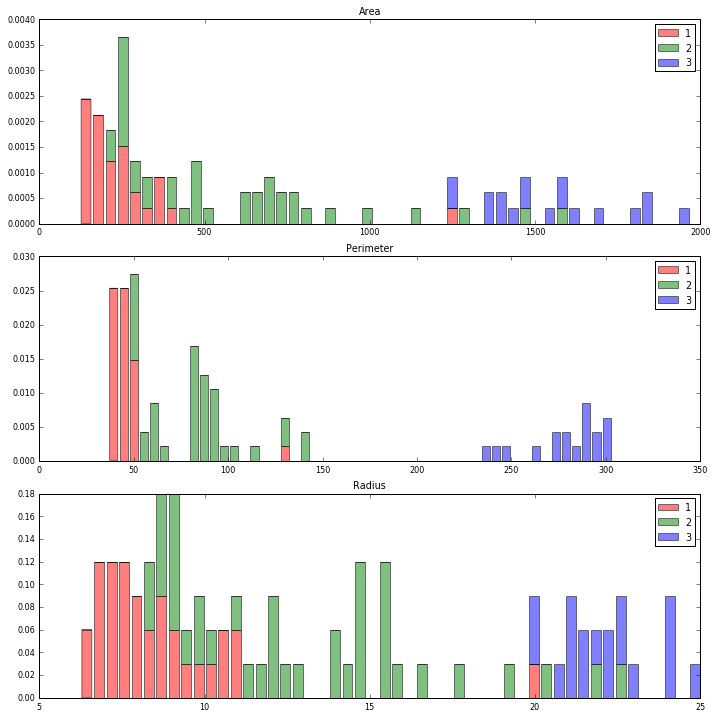

In [152]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([df1[features_mean[idx]],df2[features_mean[idx]],df3[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['1','2','3'],color=['r','g','b'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()


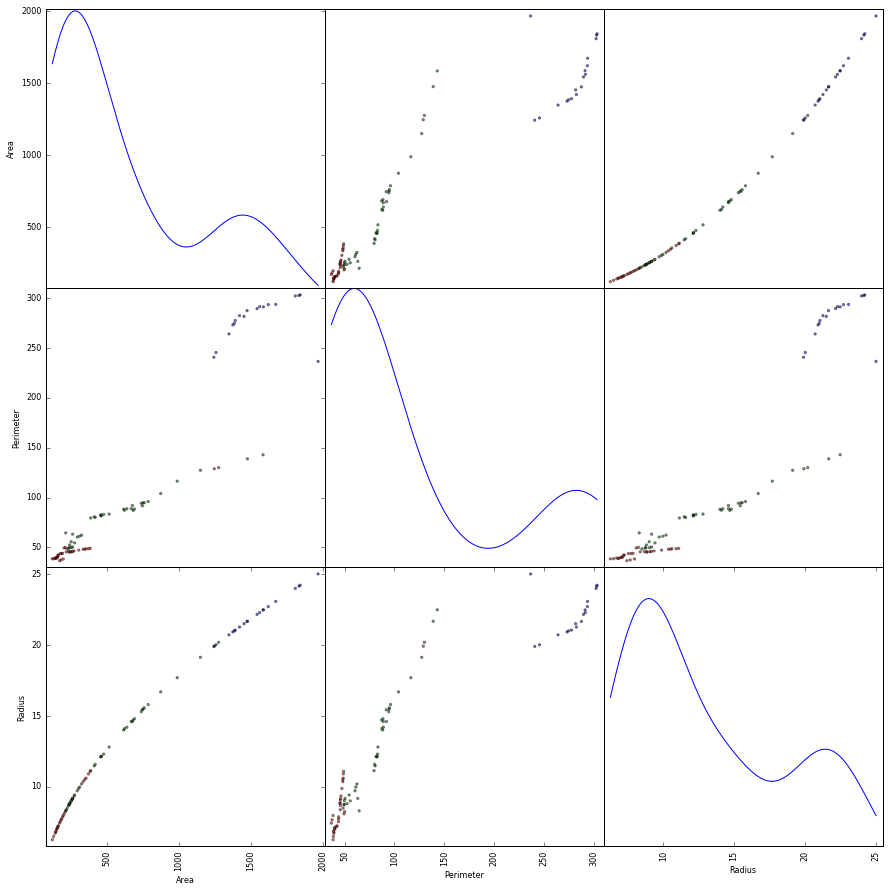

In [153]:
observables = df.loc[:,features_mean]
color_wheel = {3: "blue", 1: "red", 2: "green"}
colors = df["Label"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde');

In [171]:
X = df.loc[:,['Area','Perimeter','Radius']].as_matrix()
y = df.loc[:,['Label']].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5)
#print X_train.shape[0]
#print y_train
#print X_test
#print y_test
traindf, testdf = train_test_split(df, test_size = 0.3)
#print type(traindf)
#print testdf.shape[0]
dfP = pd.read_csv('parameter.csv',sep = ',', header=0)
Ptest_X = dfP.loc[:,['Area','Perimeter','Radius']].as_matrix()
print Ptest_X

[[ 296.       60.422     9.7067]
 [ 105.       34.28      5.7812]]


In [169]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [172]:
#Logistic Regression
predictor_var = features_mean
outcome_var='Label'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)
classification_model(model,testdf,predictor_var,outcome_var)

Accuracy : 91.935%
Cross-Validation Score : 92.308%
Cross-Validation Score : 88.462%
Cross-Validation Score : 89.530%
Cross-Validation Score : 90.064%
Cross-Validation Score : 88.718%
Accuracy : 85.185%
Cross-Validation Score : 83.333%
Cross-Validation Score : 83.333%
Cross-Validation Score : 82.222%
Cross-Validation Score : 81.667%
Cross-Validation Score : 77.333%


In [157]:
#Decision Tree
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)
classification_model(model,testdf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 92.308%
Cross-Validation Score : 96.154%
Cross-Validation Score : 97.436%
Cross-Validation Score : 95.994%
Cross-Validation Score : 96.795%
Accuracy : 100.000%
Cross-Validation Score : 83.333%
Cross-Validation Score : 66.667%
Cross-Validation Score : 77.778%
Cross-Validation Score : 83.333%
Cross-Validation Score : 82.667%


In [158]:
#Random forest
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)
model = RandomForestClassifier(n_estimators=100)
classification_model(model,testdf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 92.308%
Cross-Validation Score : 96.154%
Cross-Validation Score : 97.436%
Cross-Validation Score : 95.994%
Cross-Validation Score : 96.795%
Accuracy : 100.000%
Cross-Validation Score : 83.333%
Cross-Validation Score : 75.000%
Cross-Validation Score : 83.333%
Cross-Validation Score : 87.500%
Cross-Validation Score : 86.000%


In [159]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Perimeter    0.355534
Radius       0.325294
Area         0.319172
dtype: float64
